#### Importing Data

In [1]:
import sqlite3
import pandas as pd

In [2]:
# connecting to sqlite database
conn = sqlite3.connect("lahman2016.sqlite")

In [3]:
# filtering data to only include teams that are currently active and played 150 or more games
query = '''
SELECT * FROM Teams
INNER JOIN TeamsFranchises
ON Teams.franchID == TeamsFranchises.franchID
WHERE Teams.G >= 150 AND TeamsFranchises.active == 'Y';
'''

In [4]:
# getting the filtered result from database
Teams = conn.execute(query).fetchall()

In [5]:
# converting the teams to a dataframe using pandas
teams_df = pd.DataFrame(Teams)
teams_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


#### Data Preparation and Cleaning

In [6]:
# adding column names
cols = ['yearID','lgID','teamID','franchID','divID',
        'Rank','G','Ghome','W','L','DivWin','WCWin',
        'LgWin','WSWin','R','AB','H','2B','3B','HR',
        'BB','SO','SB','CS','HBP','SF','RA','ER','ERA',
        'CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
        'E','DP','FP','name','park','attendance','BPF',
        'PPF','teamIDBR','teamIDlahman45','teamIDretro',
        'franchID','franchName','active','NAassoc']
teams_df.columns = cols

In [7]:
# set option used to display all columns
pd.set_option('display.max_columns', None)
teams_df.head(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [8]:
# dropping columns that won't be used
drop_cols = ['lgID','franchID','divID','Rank','Ghome',
             'L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF',
             'teamIDBR','teamIDlahman45','teamIDretro',
             'franchID','franchName','active','NAassoc']
# axis=1 refers to columns, axis=0 refers to rows
df = teams_df.drop(drop_cols,axis=1)

In [9]:
df.head(5)

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


In [10]:
# checking null values for each column
print(df.isnull().sum(axis=0).tolist()) # counts the number of missing values in each column
# 110 null values for SO (strikeout), 22 for DP (double play), 419 for CS (caught stealing), 1777 for HBP (hit by pitch)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [11]:
# dropping CS and HBP columns
df = df.drop(['CS', 'HBP'], axis=1)

In [12]:
# using the median of the columns to fill out the null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

In [13]:
# checkinga again for null values
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
df.head(5)

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


#### Data Visualization

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Histogram for # of Wins')

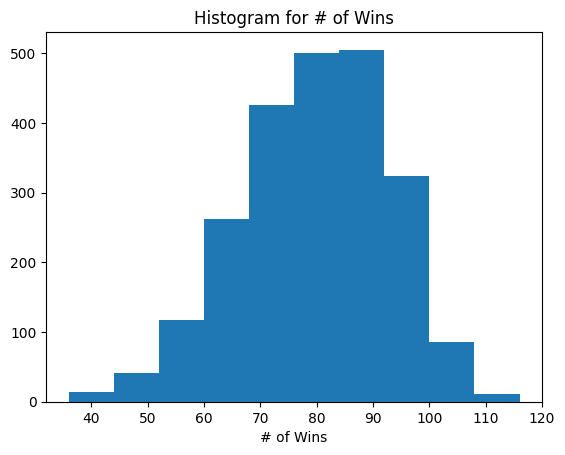

In [16]:
# visualizing wins as a histogram
plt.hist(df['W'])
plt.xlabel ('# of Wins')
plt.title ('Histogram for # of Wins')
# y-axis is the frequency (count) of data points that fall within that range

In [17]:
# checking the average number of wins
df['W'].mean()

79.23043288150416

In [18]:
def win_bins(w):
    if w < 50:
        return 1
    elif w >= 50 and w < 70:
        return 2
    elif w >= 70 and w < 90:
        return 3
    elif w >= 90 and w < 110:
        return 4
    else:
        return 5

In [19]:
# applying function to 'W' column
df['win_bins'] = df['W'].apply(win_bins)

Text(0, 0.5, 'wins')

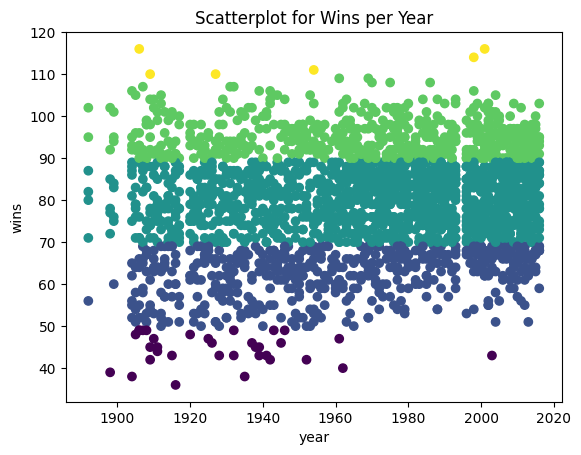

In [20]:
# creating scatter plot using win bins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Scatterplot for Wins per Year')
plt.xlabel('year')
plt.ylabel('wins')

In [21]:
# dropping data before 1900 as they seem incomplete
df = df[df['yearID'] > 1900]

In [22]:
# creating dictionaries for runs per year and games per year
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']

    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

#print(runs_per_year)
#print(games_per_year)

In [23]:
# create mlb_runs_per_game dictionary with years as keys and number of runs per game as value
mlb_runs_per_game = {}

for year, games in games_per_year.items():
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs/games

#print(mlb_runs_per_game)

In [24]:
# visualizing yearly MLB runs per game
# create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists) # x is the list of keys, y is the list of values

Text(0, 0.5, 'mlb runs per game')

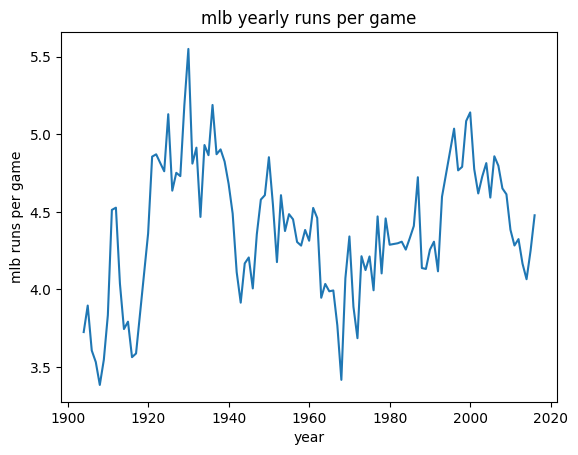

In [25]:
# creating line plot of mlb_runs_per_game vs year
plt.plot(x, y)
plt.title('mlb yearly runs per game')
plt.xlabel('year')
plt.ylabel('mlb runs per game')

In [26]:
# creating eras based on the trends from the above visualization
def era_bins(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

In [27]:
df['year_label'] = df['yearID'].apply(era_bins)

In [28]:
df_temp = pd.get_dummies(df['year_label'],prefix='era')

In [29]:
df = pd.concat([df, df_temp], axis=1)

In [30]:
df.head(2)

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3,4,False,False,False,True,False,False,False,False
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3,4,False,False,False,True,False,False,False,False


In [31]:
# creating columns for mlb runs per game
def mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(mlb_rpg)

In [32]:
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010

In [33]:
df['decade_label'] = df['yearID'].apply(assign_decade)

In [34]:
decade_df = pd.get_dummies(df['decade_label'],prefix='decade')

In [35]:
df = pd.concat([df,decade_df],axis=1)

In [36]:
# dropping unnecessary columns
df = df.drop(['yearID','year_label','decade_label'],axis=1)

In [37]:
# adding two features to help with the prediction of the model: R(runs per game) and RA(runs allowed per game)
df['R_per_game'] = df['R']/df['G']
df['RA_per_game'] = df['RA']/df['G']

Text(0.5, 0, 'runs allowed per game')

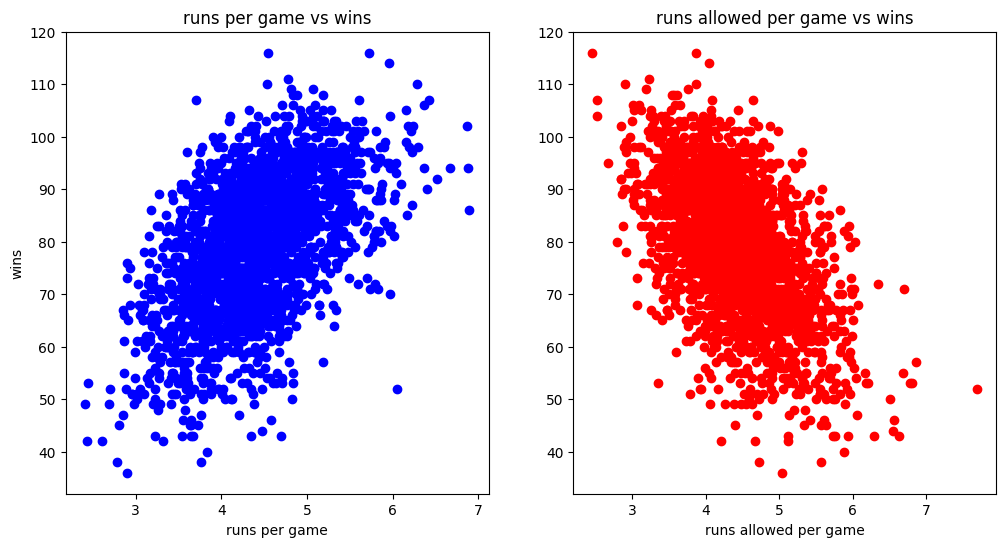

In [38]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'],df['W'],c='blue')
ax1.set_title('runs per game vs wins')
ax1.set_ylabel('wins')
ax1.set_xlabel('runs per game')

ax2.scatter(df['RA_per_game'],df['W'],c='red')
ax2.set_title('runs allowed per game vs wins')
ax2.set_xlabel('runs allowed per game')

In [39]:
# creating dataframe to leave out the target column
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3',
'era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930',
'decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990',
'decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']

In [40]:
data_attributes = df[attributes]

In [41]:
data_attributes.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,mlb_rpg
0,162,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,4.592593,4.839506,4.525175
1,162,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,4.432099,4.358025,4.460518
2,161,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,3.708075,4.099379,3.946881
3,162,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,3.358025,3.401235,4.035670
4,162,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,3.253086,3.512346,3.988293


#### K-Means Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [43]:
# using silhouette_score to select number of clusters
# range from -1 to 1: values near 0 represent overlapping clusters, -1 means that the sample has been assigned to an incorrect cluster
score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state=1)
    l = km.fit_predict(data_attributes)
    score = metrics.silhouette_score(data_attributes,l)
    score_dict[i] = score

In [44]:
score_dict

{2: 0.3903014750753016,
 3: 0.3386564269132926,
 4: 0.2543045423224275,
 5: 0.23780576663111155,
 6: 0.21094352988048443,
 7: 0.19581595516621153,
 8: 0.18454777673524292,
 9: 0.1785356913930071,
 10: 0.17162636676066192}

In [45]:
# using 6 as the size of the cluster
kmeans_model = KMeans(n_clusters = 6, random_state=1)

In [46]:
#determine euclidian distances for each data points
distances = kmeans_model.fit_transform(data_attributes)

In [47]:
distances

array([[ 361.38664728,  865.17943617,  813.9448817 ,  438.052711  ,
         410.51290763,  420.62460523],
       [ 365.61463764,  721.38421243,  635.4483372 ,  197.80563739,
         250.9042687 ,  465.60178391],
       [ 465.55628572,  656.06963019,  662.64824941,  259.51851112,
         176.99901082,  464.00741441],
       ...,
       [ 620.71580425, 1099.52312517, 1195.45946736,  711.52805946,
         625.03267618,  313.22943518],
       [ 616.73761567, 1115.14041686, 1210.59099765,  761.53623635,
         656.09774993,  307.86608807],
       [ 655.43132096, 1200.27499722, 1275.4489285 ,  799.58854435,
         713.34690732,  345.35359647]])

Text(0.5, 1.0, 'kmeans clusters')

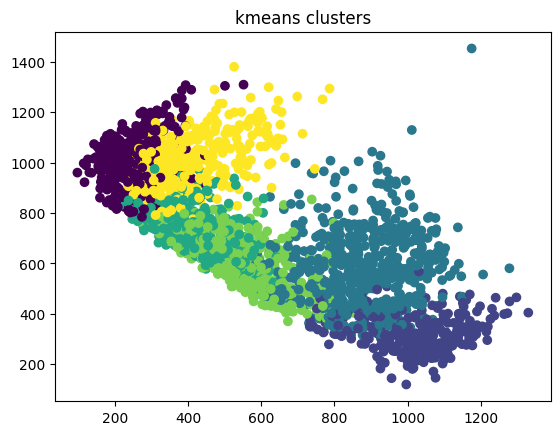

In [48]:
labels = kmeans_model.labels_
plt.scatter(distances[:,0],distances[:,1],c=labels)
plt.title('kmeans clusters')

In [49]:
# adding labels from the clusters as a new column to df
df['labels'] = labels
attributes.append('labels')
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,labels
0,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3,False,False,False,True,False,False,False,False,4.525175,False,False,False,False,False,True,False,False,False,False,False,4.592593,4.839506,0
1,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3,False,False,False,True,False,False,False,False,4.460518,False,False,False,False,False,True,False,False,False,False,False,4.432099,4.358025,3
2,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3,False,False,False,False,True,False,False,False,3.946881,False,False,False,False,False,True,False,False,False,False,False,3.708075,4.099379,4
3,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3,False,False,False,False,True,False,False,False,4.035670,False,False,False,False,False,True,False,False,False,False,False,3.358025,3.401235,4
4,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3,False,False,False,False,True,False,False,False,3.988293,False,False,False,False,False,True,False,False,False,False,False,3.253086,3.512346,4


In [50]:
# creating a dataframe to only include numeric columns
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV',
'IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7',
'era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970',
'decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg','labels','W']

In [51]:
data = df[numeric_cols]

In [52]:
# splitting data into train and test sets
train = data.sample(frac = 0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

In [53]:
x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']